# Larsen

### Larsen 

bmax =  0.1


<Figure size 640x480 with 0 Axes>

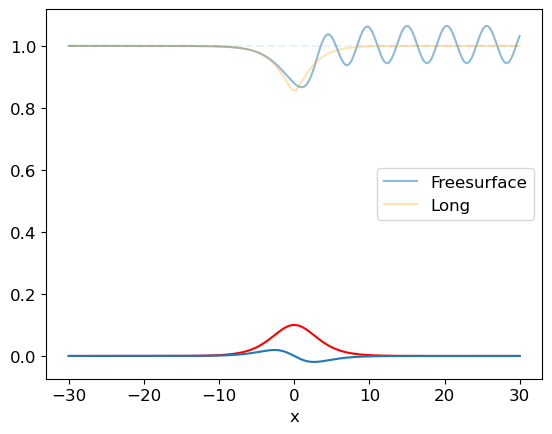

In [45]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import bisect
import obstacles as obstacles

def trouver_k(h, nu):
    # Définir la fonction à résoudre
    def f(k):
        return k - nu * np.tanh(k * h)

    # Définir un intervalle de recherche initial
    k_min = 0.0001  # une petite valeur proche de zéro
    k_max = 100  # une valeur suffisamment grande pour inclure la solution

    # Utiliser la méthode de la bissection pour trouver la racine
    k_solution = bisect(f, k_min, k_max)

    return k_solution

def find_closest_value_index(array, target_value):
    array = np.array(array)
    closest_index = np.abs(array - target_value).argmin()
    return closest_index

def larsen_wakeless(x):
    nu = 1/(F**2*h0)
    k = trouver_k(h0, nu)
    L = n*2*np.pi/k
    return np.power(np.cosh(x / 4), -2) + np.power(np.cosh((x-L) / 4), -2)

def sub(x,hamont,Fr):
    return hamont*(1/3*(1+Fr**2/2-x/hamont)+2/3*(1+Fr**2/2-x/hamont)*np.cos(1/3*np.arccos(1-27/4*Fr**2/(1+Fr**2/2-x/hamont)**3)))


# parametres

bmax = 0.1
F = 0.62


X = np.linspace(-30, 30, 5000)

# Conditions initiales

h0 =  1
dh0 = 0  
n = 15



s = obstacles.larsen
# s = larsen_wakeless


Y = np.array([s(x) for x in X])
Y = bmax*Y/max(Y)

print ('bmax = ', max(Y) )



ds1=np.gradient(Y,X)
d2s1=np.gradient(ds1,X)




def model_gradient(y, x):
    h, dhdx = y[0], y[1]
    # idx = np.argwhere(np.diff(np.sign(x- np.array(X))) != 0).reshape(-1)
    idx = find_closest_value_index(X, x)
    P2 = h**4 * (h**2/2 + h*Y[idx] + Y[idx]**2/2) + F**2 * h * (-1/2 * Y[idx]**2 - h**2/6 - h*Y[idx])
    P1 = -4/3 * h**2 - 2*h*Y[idx] + Y[idx]**2
    P0 = -4/3 * h**2 - 10*h*Y[idx] - Y[idx]**2
    Q1 = h**2/2 - 13/3 * h*Y[idx] - 1/6 * Y[idx]**2
    # print (d2s1[idx])
    # print (ds1[idx])
    R = -h**2 * (h**3 - (1 + F**2/2 - Y[idx]) * h**2 + F**2/2) - d2s1[idx]*(h**4 * (h**2/2 + h*Y[idx] + Y[idx]**2/2) + 2/3 * F**2 * h**3)
    
    d2hdx2 = (R - P1 * F**2 * (dhdx**2) - P0 * F**2 * dhdx * ds1[idx] - Q1 *F **2 * ds1[idx]**2 ) / P2
    
    return [dhdx, d2hdx2]


initial_conditions = [h0, dh0]
plt.figure()


# Résoudre l'équation différentielle

solution_gradient = odeint(model_gradient, initial_conditions, X[:-1])

f=np.vectorize(sub)

dh = np.gradient(solution_gradient[:, 0],X[-1])
d2h = np.gradient(dh,X[-1])



plt.figure()
# Tracer la solution

plt.plot(X[:-1], solution_gradient[:, 0] + Y[:-1], label='Freesurface', color = 'tab:blue', alpha = 0.5)
plt.plot( X, h0*Y + f(h0*Y,h0,F), label = 'Long', color = 'orange', alpha = 0.3 )


plt.legend()
plt.plot(X, 0*X + 1, '--', color = 'tab:blue', alpha=0.1  )
    
# plt.ylim( 0.9, 1.1)
# plt.xlim(15, 30)
# Tracer l'obstacle 

plt.plot(X, Y, 'r')
plt.plot( X, ds1 )
plt.xlabel('x')
plt.show()


### Avec ivp

bmax =  0.4


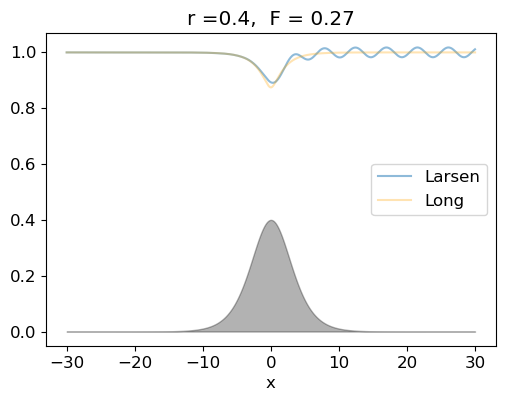

In [61]:
from scipy.integrate import solve_ivp


bmax = 0.4
F = 0.27


X = np.linspace(-30, 30, 5000)

# Conditions initiales

h0 =  1
dh0 = 0  
n = 15



s = obstacles.larsen
# s = larsen_wakeless


Y = np.array([s(x) for x in X])
Y = bmax*Y/max(Y)

print ('bmax = ', max(Y) )



ds1=np.gradient(Y,X)
d2s1=np.gradient(ds1,X)

def model_gradient(x, y):
    h, dhdx = y[0], y[1]
    idx = find_closest_value_index(X, x)
    P2 = h**4 * (h**2/2 + h*Y[idx] + Y[idx]**2/2) + F**2 * h * (-1/2 * Y[idx]**2 - h**2/6 - h*Y[idx])
    P1 = -4/3 * h**2 - 2*h*Y[idx] + Y[idx]**2
    P0 = -4/3 * h**2 - 10*h*Y[idx] - Y[idx]**2
    Q1 = h**2/2 - 13/3 * h*Y[idx] - 1/6 * Y[idx]**2
    R = -h**2 * (h**3 - (1 + F**2/2 - Y[idx]) * h**2 + F**2/2) - d2s1[idx]*(h**4 * (h**2/2 + h*Y[idx] + Y[idx]**2/2) + 2/3 * F**2 * h**3)
    
    d2hdx2 = (R - P1 * F**2 * (dhdx**2) - P0 * F**2 * dhdx * ds1[idx] - Q1 * F**2 * ds1[idx]**2) / P2
    
    return [dhdx, d2hdx2]

# Résolution avec solve_ivp
solution_gradient_ivp = solve_ivp(model_gradient, [X[0], X[-1]], initial_conditions, t_eval=X[:-1])

# Solution obtenue avec solve_ivp
h_ivp = solution_gradient_ivp.y[0]
dhdx_ivp = solution_gradient_ivp.y[1]

# Tracer les résultats
fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)
plt.plot(X[:-1], h_ivp + Y[:-1], label='Larsen', color='tab:blue', alpha=0.5)
plt.plot(X, h0*Y + f(h0*Y, h0, F), label='Long', color='orange', alpha=0.3)
plt.fill_between(X, Y, 0, color='black', alpha=0.3)
# plt.plot(X, ds1)
plt.title( f'r ={bmax},  F = {F}' )
plt.xlabel('x')
plt.legend(loc = 5)
plt.show()


### Subplots

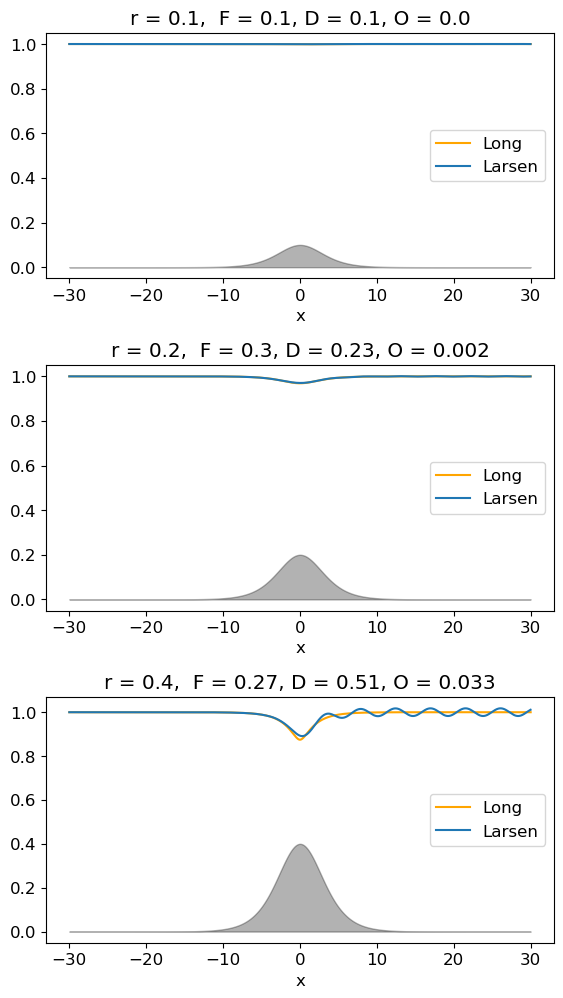

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres pour chaque subplot
params = [
    (0.1, 0.1),
    (0.2, 0.3),
    (0.4, 0.27)
]

X = np.linspace(-30, 30, 5000)

# Conditions initiales
h0 = 1
dh0 = 0
n = 15

s = obstacles.larsen  # ou larsen_wakeless

# Créer une figure avec 3 sous-graphes
fig_size = (large_figure_width, 2.5*large_figure_height)


fig, axs = plt.subplots(3, 1, figsize=fig_size)

# Boucle pour générer chaque subplot
for i, (bmax, F) in enumerate(params):
    Y = np.array([s(x) for x in X])
    Y = bmax * Y / max(Y)

    ds1 = np.gradient(Y, X)
    d2s1 = np.gradient(ds1, X)

    def model_gradient(x, y):
        h, dhdx = y[0], y[1]
        idx = find_closest_value_index(X, x)
        P2 = h**4 * (h**2/2 + h*Y[idx] + Y[idx]**2/2) + F**2 * h * (-1/2 * Y[idx]**2 - h**2/6 - h*Y[idx])
        P1 = -4/3 * h**2 - 2 * h * Y[idx] + Y[idx]**2
        P0 = -4/3 * h**2 - 10 * h * Y[idx] - Y[idx]**2
        Q1 = h**2 / 2 - 13 / 3 * h * Y[idx] - 1 / 6 * Y[idx]**2
        R = -h**2 * (h**3 - (1 + F**2 / 2 - Y[idx]) * h**2 + F**2 / 2) - d2s1[idx] * (h**4 * (h**2 / 2 + h * Y[idx] + Y[idx]**2 / 2) + 2 / 3 * F**2 * h**3)

        d2hdx2 = (R - P1 * F**2 * (dhdx**2) - P0 * F**2 * dhdx * ds1[idx] - Q1 * F**2 * ds1[idx]**2) / P2
        return [dhdx, d2hdx2]

    # Résolution avec solve_ivp
    solution_gradient_ivp = solve_ivp(model_gradient, [X[0], X[-1]], [h0, dh0], t_eval=X[:-1])

    # Solution obtenue avec solve_ivp
    h_ivp = solution_gradient_ivp.y[0]
    dhdx_ivp = solution_gradient_ivp.y[1]

    hup = np.mean(h_ivp[:10])
    hmin = min(h_ivp[:])
    bmax = max(Y[:-1])
    derniers_points = h_ivp[:][-300:]
    hond = np.max(derniers_points) - np.min(derniers_points)
    D = (hup - hmin) / hup
    O = hond/hup    
    
    # Tracer les résultats sur le subplot correspondant

    axs[i].plot(X, h0 * Y + f(h0 * Y, h0, F), label='Long', color='orange')
    axs[i].plot(X[:-1], h_ivp + Y[:-1], label=f'Larsen', color='tab:blue')    
    axs[i].fill_between(X, Y, 0, color='black', alpha=0.3)
    axs[i].set_title(f'r = {bmax},  F = {F}, D = {round(D,2)}, O = {round(O,3)}')
    axs[i].set_xlabel('x')
    axs[i].legend(loc=5)

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.savefig('../figures/larsen-multi.pdf')
plt.show()


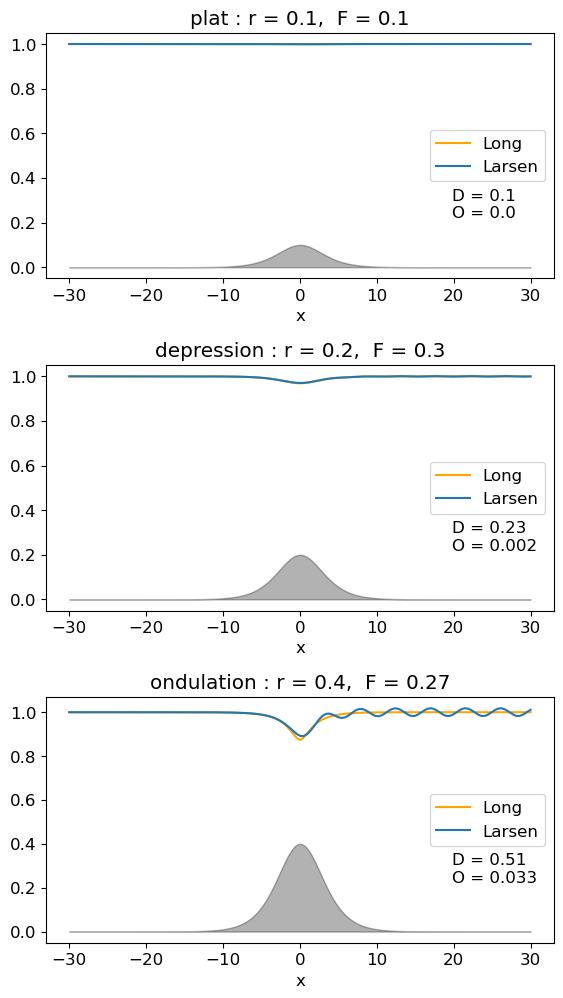

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres pour chaque subplot
params = [
    (0.1, 0.1),
    (0.2, 0.3),
    (0.4, 0.27)
]
cass = ['plat', 'depression', 'ondulation']
X = np.linspace(-30, 30, 5000)

# Conditions initiales
h0 = 1
dh0 = 0
n = 15

s = obstacles.larsen  # ou larsen_wakeless

# Créer une figure avec 3 sous-graphes
fig_size = (large_figure_width, 2.5 * large_figure_height)

fig, axs = plt.subplots(3, 1, figsize=fig_size)

# Boucle pour générer chaque subplot
for i, (bmax, F) in enumerate(params):
    cas = cass[i]
    Y = np.array([s(x) for x in X])
    Y = bmax * Y / max(Y)

    ds1 = np.gradient(Y, X)
    d2s1 = np.gradient(ds1, X)

    def model_gradient(x, y):
        h, dhdx = y[0], y[1]
        idx = find_closest_value_index(X, x)
        P2 = h**4 * (h**2/2 + h*Y[idx] + Y[idx]**2/2) + F**2 * h * (-1/2 * Y[idx]**2 - h**2/6 - h*Y[idx])
        P1 = -4/3 * h**2 - 2 * h * Y[idx] + Y[idx]**2
        P0 = -4/3 * h**2 - 10 * h * Y[idx] - Y[idx]**2
        Q1 = h**2 / 2 - 13 / 3 * h * Y[idx] - 1 / 6 * Y[idx]**2
        R = -h**2 * (h**3 - (1 + F**2 / 2 - Y[idx]) * h**2 + F**2 / 2) - d2s1[idx] * (h**4 * (h**2 / 2 + h * Y[idx] + Y[idx]**2 / 2) + 2 / 3 * F**2 * h**3)

        d2hdx2 = (R - P1 * F**2 * (dhdx**2) - P0 * F**2 * dhdx * ds1[idx] - Q1 * F**2 * ds1[idx]**2) / P2
        return [dhdx, d2hdx2]

    # Résolution avec solve_ivp
    solution_gradient_ivp = solve_ivp(model_gradient, [X[0], X[-1]], [h0, dh0], t_eval=X[:-1])

    # Solution obtenue avec solve_ivp
    h_ivp = solution_gradient_ivp.y[0]
    dhdx_ivp = solution_gradient_ivp.y[1]

    hup = np.mean(h_ivp[:10])
    hmin = min(h_ivp[:])
    bmax = max(Y[:-1])
    derniers_points = h_ivp[:][-300:]
    hond = np.max(derniers_points) - np.min(derniers_points)
    D = (hup - hmin) / hup
    O = hond / hup

    # Tracer les résultats sur le subplot correspondant
    axs[i].plot(X, h0 * Y + f(h0 * Y, h0, F), label='Long', color='orange')
    axs[i].plot(X[:-1], h_ivp + Y[:-1], label='Larsen', color='tab:blue')
    axs[i].fill_between(X, Y, 0, color='black', alpha=0.3)
    axs[i].set_title(f'{cas} : r = {bmax},  F = {F}')
    axs[i].set_xlabel('x')
    axs[i].legend(loc=5)

    # Ajouter le texte O et D à droite de chaque subplot
    axs[i].text(0.8, 0.3, f'D = {round(D, 2)}\nO = {round(O, 3)}', 
                transform=axs[i].transAxes,  # Coordonnées relatives à l'axe
                fontsize=12, verticalalignment='center')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.savefig('../figures/larsen-multi.pdf')
plt.show()


## Larsen original

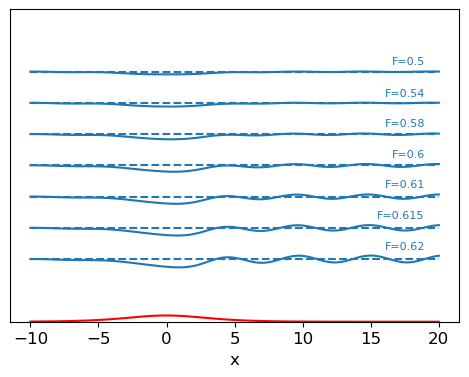

In [7]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height



# parametres

F_list = ( .62, .615, .61, .6, .58, .54, .5 )

shift = 0.5

F = 0.2
x = np.linspace(-10, 20, 100)

# Conditions initiales

h0 =  1
dh0 = 0  





# Définir la fonction pour s(x)
def s(x):
    return 0.1 * np.power(np.cosh(x / 4), -2)


def ds(x):
    return -0.05*( 1 - np.tanh(x/4)**2 )*np.tanh(x/4)
    # return -0.0015*np.tanh(x/4)/(np.cosh(x/4)**2)



def d2s(x):
    # return 0.005*np.tanh(x/4)**2/(np.cosh(x/4)**2) - 0.00125/(np.cosh(x/4)**2)
    return -0.5*ds(x)*np.tanh(x/4)-0.125*s(x)*(1 - np.tanh(x/4)**2)



# k=np.vectorize(s)
# r=k(x)
# ds1=np.gradient(r,x)


# # d2s1=np.gradient(ds1,x)
# plt.figure()
# plt.figure(r"s'(x)")
# plt.plot( x, ds(x) )
# plt.plot( x, ds1, '--' )



# plt.figure(r"s''(x)")
# plt.plot( x, d2s(x) )
# plt.plot( x, d2s1, '--' )



def model(y, x):
    h, dhdx = y[0], y[1]    
    P2 = h**4 * (h**2/2 + h*s(x) + s(x)**2/2) + F**2 * h * (-1/2 * s(x)**2 - h**2/6 - h*s(x))
    P1 = -4/3 * h**2 - 2*h*s(x) + s(x)**2
    P0 = -4/3 * h**2 - 10*h*s(x) - s(x)**2
    Q1 = h**2/2 - 13/3 * h*s(x) - 1/6 * s(x)**2
    
    R = -h**2 * (h**3 - (1 + F**2/2 - s(x)) * h**2 + F**2/2) - d2s(x)*(h**4 * (h**2/2 + h*s(x) + s(x)**2/2) + 2/3 * F**2 * h**3)
    
    d2hdx2 = (R - P1 * F**2 * (dhdx**2) - P0 * F**2 * dhdx * ds(x) - Q1 *F **2 * ds(x)**2 ) / P2
    
    return [dhdx, d2hdx2]


initial_conditions = [h0, dh0]
fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)

for i, F in enumerate(F_list) :


    # Résoudre l'équation différentielle
    solution = odeint(model, initial_conditions, x)
    # Tracer la solution

    plt.plot(x, solution[:, 0] + s(x) + shift*i, label='h(x)', color = 'tab:blue')
    plt.plot(x, 0*x + shift*i + 1, '--', color = 'tab:blue'  )
    
    # Annotate each curve with the value of F
    plt.annotate(f'F={F}', xy=(x[-1], solution[-1, 0] + shift*i), textcoords='offset points', xytext=(-10,5), ha='right', fontsize=8, color='tab:blue')




    
plt.plot(x, s(x), 'r' )
plt.xlabel('x')
plt.ylim(0, 5)
plt.yticks([])
# plt.axis('off')
plt.savefig('../figures/larsen.pdf')
plt.show()


## Diagramme de phase

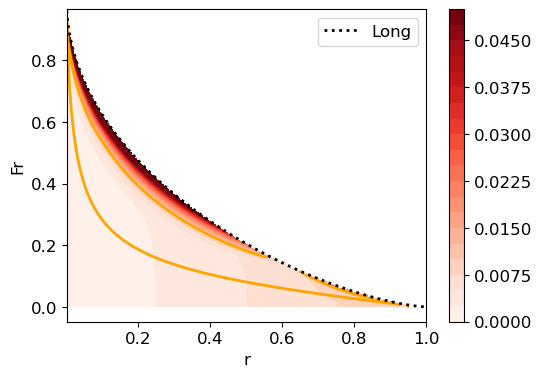

In [28]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

def long(r) :
    return (2*np.sin( 1/3*np.arcsin(1-r) ))**(3/2)

with open('resultats2.json', 'r') as f:
    data = json.load(f)


# Extraire les valeurs de r, F, et U
r_values = [entry['r'] for entry in data]
F_values = [entry['F'] for entry in data]

# Trouver les valeurs uniques de r et F
r_unique = np.unique(r_values)
F_unique = np.unique(F_values)

# Créer une grille pour r et F
R, F_mesh = np.meshgrid(r_unique, F_unique)

# Créer une matrice vide pour U
U = np.zeros_like(R)
D = np.zeros_like(R)
O = np.zeros_like(R)

# Remplir la matrice U avec les valeurs correspondantes
for entry in data:
    r_idx = np.where(r_unique == entry['r'])[0][0]
    F_idx = np.where(F_unique == entry['F'])[0][0]
    U[F_idx, r_idx] = entry['U']
    D[F_idx, r_idx] = entry['D']
    O[F_idx, r_idx] = entry['O']

    
# Calculer la courbe long(r) pour chaque valeur de r
long_r = long(r_unique)

# Créer un masque pour garder uniquement les valeurs en dessous de la courbe long(r)
mask = F_mesh <= long_r


U_filtered = np.clip(U, 0, 1)
D_filtered = np.clip(D, 0, 1)
O_filtered = np.clip(O, 0, .05)

O_masked = np.where(mask, O_filtered, np.nan)
D_masked = np.where(mask, D_filtered, np.nan)
U_masked = np.where(mask, U_filtered, np.nan)


O_threshold = 0.01  # Seuil pour hmin
D_threshold = 0.01    # Seuil pour D
U_threshold = 0.15    # Seuil pour U




# Tracer le contour
fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)
# contour = plt.contourf(R, F_mesh, O_filtered, cmap='Reds', levels=20)

# plt.contour(R, F_mesh, D_masked, levels=[D_threshold], colors='orange', linewidths=2, label = 'Limite apparition dépression')
# # plt.contour(R, F_mesh, U_filtered, levels=[U_threshold], colors='orange', linewidths=2)
# plt.contour(R, F_mesh, O_masked, levels=[O_threshold], colors='red', linewidths=2, label = 'Limite apparition ondulation')


# plt.plot(r_unique, long(r_unique), color = 'black', lw = 2, label = 'Long', ls = ':')


contour = plt.contourf(R, F_mesh, O_masked, cmap='Reds', levels=20)

depression = plt.contour(R, F_mesh, D_masked, levels=[D_threshold], colors='orange', linewidths=2)
# plt.contour(R, F_mesh, U_filtered, levels=[U_threshold], colors='orange', linewidths=2)
ondulation = plt.contour(R, F_mesh, O_masked, levels=[O_threshold], colors='orange', linewidths=2)

handles_depression, labels = depression.legend_elements()
handles_ondulation, labels = ondulation.legend_elements()
Long = plt.plot(r_unique, long(r_unique), color = 'black', lw = 2, label = 'Long', ls = ':')

plt.legend(handles_depression + handles_ondulation + Long,
          [ "Limite apparition de la depression", "Limite apparition ondulations", 'Long'])




plt.legend()
# Ajouter une barre de couleurs
plt.colorbar(contour)

# Ajouter des labels et un titre
# plt.title(r"Heatmap du rapport de l'amplitude de l'ondulation sur la hauteur d'eau amont")
plt.xlabel("r")
plt.ylabel("Fr")
# plt.savefig( '../figures/undular-larsen-filter.pdf' )
# Afficher le graphique
plt.show()



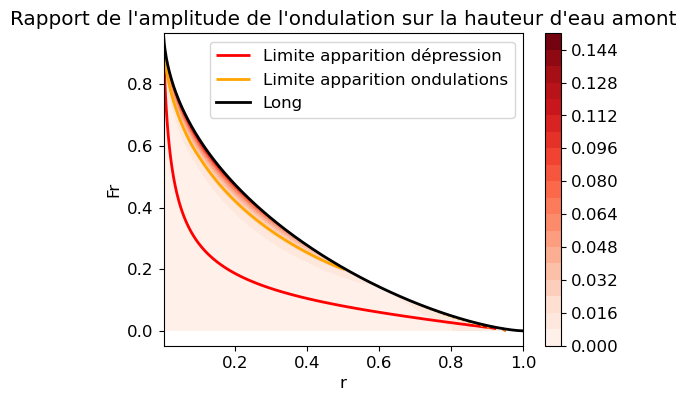

In [42]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

def long(r) :
    return (2*np.sin( 1/3*np.arcsin(1-r) ))**(3/2)

with open('resultats2.json', 'r') as f:
    data = json.load(f)


# Extraire les valeurs de r, F, et U
r_values = [entry['r'] for entry in data]
F_values = [entry['F'] for entry in data]

# Trouver les valeurs uniques de r et F
r_unique = np.unique(r_values)
F_unique = np.unique(F_values)

# Créer une grille pour r et F
R, F_mesh = np.meshgrid(r_unique, F_unique)

# Créer une matrice vide pour U
U = np.zeros_like(R)
D = np.zeros_like(R)
O = np.zeros_like(R)

# Remplir la matrice U avec les valeurs correspondantes
for entry in data:
    r_idx = np.where(r_unique == entry['r'])[0][0]
    F_idx = np.where(F_unique == entry['F'])[0][0]
    U[F_idx, r_idx] = entry['U']
    D[F_idx, r_idx] = entry['D']
    # O[F_idx, r_idx] = entry['O']

    
# Calculer la courbe long(r) pour chaque valeur de r
long_r = long(r_unique)

# Créer un masque pour garder uniquement les valeurs en dessous de la courbe long(r)
mask = F_mesh <= long_r

O = U*D
U_filtered = np.clip(U, 0, 1)
D_filtered = np.clip(D, 0, 1)
O_filtered = np.clip(O, 0, .15)

O_masked = np.where(mask, O_filtered, np.nan)
D_masked = np.where(mask, D_filtered, np.nan)
U_masked = np.where(mask, U_filtered, np.nan)


O_threshold = 0.02  # Seuil pour hmin
D_threshold = 0.01    # Seuil pour D
U_threshold = 0.15    # Seuil pour U




# Tracer le contour
fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)
contour = plt.contourf(R, F_mesh, O_masked, cmap='Reds', levels=20)

depression = plt.contour(R, F_mesh, D_masked, levels=[D_threshold], colors='red', linewidths=2)
# plt.contour(R, F_mesh, U_filtered, levels=[U_threshold], colors='orange', linewidths=2)
ondulation = plt.contour(R, F_mesh, O_masked, levels=[O_threshold], colors='orange', linewidths=2)

handles_depression, labels = depression.legend_elements()
handles_ondulation, labels = ondulation.legend_elements()
Long = plt.plot(r_unique, long(r_unique), color = 'black', lw = 2, ls = '-', label = 'Long')

plt.legend(handles_depression + handles_ondulation + Long,
          [ "Limite apparition dépression", "Limite apparition ondulations", 'Long'])



# Ajouter une barre de couleurs
plt.colorbar(contour)

# Ajouter des labels et un titre
plt.title(r"Rapport de l'amplitude de l'ondulation sur la hauteur d'eau amont")
plt.xlabel("r")
plt.ylabel("Fr")
plt.savefig( '../figures/undular-larsen.pdf' )
# Afficher le graphique
plt.show()

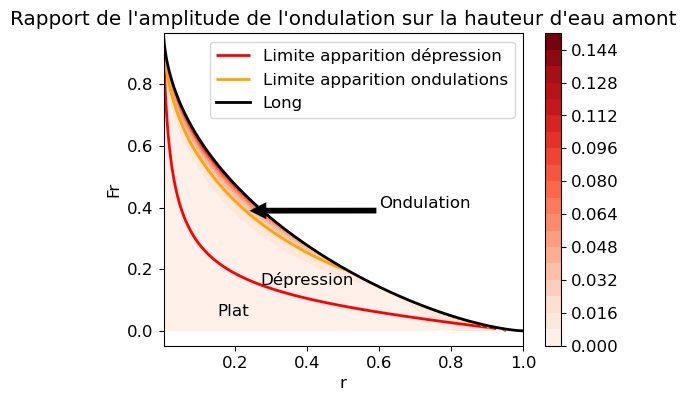

In [108]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

def long(r) :
    return (2*np.sin(1/3 * np.arcsin(1-r)))**(3/2)

with open('resultats2.json', 'r') as f:
    data = json.load(f)

# Extraire les valeurs de r, F, et U
r_values = [entry['r'] for entry in data]
F_values = [entry['F'] for entry in data]

# Trouver les valeurs uniques de r et F
r_unique = np.unique(r_values)
F_unique = np.unique(F_values)

# Créer une grille pour r et F
R, F_mesh = np.meshgrid(r_unique, F_unique)

# Créer des matrices vides pour U, D et O
U = np.zeros_like(R)
D = np.zeros_like(R)
O = np.zeros_like(R)

# Remplir les matrices U, D et O avec les valeurs correspondantes
for entry in data:
    r_idx = np.where(r_unique == entry['r'])[0][0]
    F_idx = np.where(F_unique == entry['F'])[0][0]
    U[F_idx, r_idx] = entry['U']
    D[F_idx, r_idx] = entry['D']

# Calculer la courbe long(r) pour chaque valeur de r
long_r = long(r_unique)

# Créer un masque pour les valeurs en dessous de la courbe long(r)
mask = F_mesh <= long_r

O = U * D
U_filtered = np.clip(U, 0, 1)
D_filtered = np.clip(D, 0, 1)
O_filtered = np.clip(O, 0, 0.15)

O_masked = np.where(mask, O_filtered, np.nan)
D_masked = np.where(mask, D_filtered, np.nan)
U_masked = np.where(mask, U_filtered, np.nan)

O_threshold = 0.02  # Seuil pour hmin
D_threshold = 0.01  # Seuil pour D
U_threshold = 0.15  # Seuil pour U

# Tracer le contour
fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)
contour = plt.contourf(R, F_mesh, O_masked, cmap='Reds', levels=20)

depression = plt.contour(R, F_mesh, D_masked, levels=[D_threshold], colors='red', linewidths=2)
ondulation = plt.contour(R, F_mesh, O_masked, levels=[O_threshold], colors='orange', linewidths=2)

handles_depression, labels = depression.legend_elements()
handles_ondulation, labels = ondulation.legend_elements()
Long = plt.plot(r_unique, long(r_unique), color='black', lw=2, ls='-', label='Long')

plt.legend(handles_depression + handles_ondulation + Long,
           ["Limite apparition dépression", "Limite apparition ondulations", 'Long'])

# Ajouter une barre de couleurs
plt.colorbar(contour)

# Ajouter des labels et un titre
plt.title(r"Rapport de l'amplitude de l'ondulation sur la hauteur d'eau amont")
plt.xlabel("r")
plt.ylabel("Fr")

# Ajouter les annotations pour "plat", "dépression", "ondulation"
# Position de 'plat' sous la courbe rouge
plt.text(0.15, 0.05, 'Plat', color='black')

# Position de 'dépression' entre la courbe rouge et orange
plt.text(0.27, 0.15, 'Dépression', color='black')



plt.annotate('Ondulation', xy=(0.24, 0.39), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='black', lw = 0.1), color='black')

# Sauvegarder la figure
plt.savefig('../figures/undular-larsen.pdf')

# Afficher le graphique
plt.show()
